In [98]:
import pandas as pd
import numpy as np
import itertools
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [99]:
iris = datasets.load_iris()
print(iris.data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [100]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [101]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [102]:
x = pd.DataFrame(iris.data, columns=['SL','SW','PL','PW'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [103]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


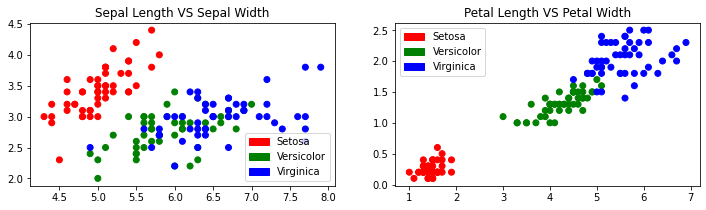

In [105]:
plt.figure(figsize=(12, 3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legends = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(x['SL'], x['SW'], c = colors[y['Target']])
plt.title('Sepal Length VS Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['PL'], x['PW'], c = colors[y['Target']])
plt.title('Petal Length VS Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [106]:
iris_k_mean_model = KMeans(n_clusters=len(iris.target_names))
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [107]:
print(iris_k_mean_model.predict(x))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [108]:
print(iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


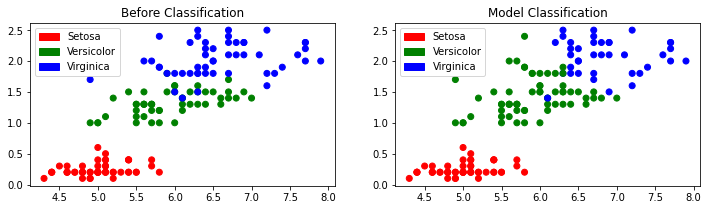

In [109]:
npr = list(itertools.permutations([0, 1, 2]))
label = np.zeros(len(npr))

for i in range(len(npr)):
  exp_predict = np.choose(iris_k_mean_model.labels_, npr[i]).astype(np.int64)
  label[i] = sm.accuracy_score(exp_predict, y['Target'])

plt.figure(figsize=(12, 3))
choices = npr[np.argmax(label)]
predictedY = np.choose(iris_k_mean_model.labels_, choices).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['SL'], x['PW'], c = colors[y['Target']])
plt.title('Before Classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['SL'], x['PW'], c = colors[predictedY])
plt.title('Model Classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [110]:
accu = sm.accuracy_score(predictedY, y['Target'])
print("{:.2f}".format(accu * 100) + '%')

89.33%


In [111]:
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75, 4) (75, 1)
(75, 4) (75, 1)


In [120]:
iris_k_mean_model = KMeans(n_clusters=len(iris.target_names))
iris_k_mean_model.fit(X_train, y_train)


KMeans(n_clusters=3)

In [121]:
print(iris_k_mean_model.predict(X_test))

[1 1 2 2 0 0 1 1 1 2 0 0 0 1 0 0 0 2 2 2 0 2 2 1 1 1 2 1 0 2 1 2 2 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 1 0 1 2 1 0 2 2 1 1 0 2 2 0 0 0 0 2 0 1 2 1 1 1 2 0
 0]


In [122]:
print(iris_k_mean_model.cluster_centers_)

[[5.05769231 3.48461538 1.48076923 0.25      ]
 [5.88064516 2.75483871 4.41612903 1.4516129 ]
 [6.90555556 3.1        5.73888889 2.11111111]]


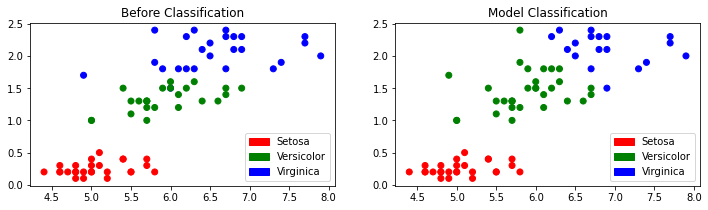

In [123]:
npr = list(itertools.permutations([0, 1, 2]))
label = np.zeros(len(npr))

for i in range(len(npr)):
  exp_predict = np.choose(iris_k_mean_model.labels_, npr[i]).astype(np.int64)
  label[i] = sm.accuracy_score(exp_predict, y_train['Target'])

plt.figure(figsize=(12, 3))
choices = npr[np.argmax(label)]
predictedY = np.choose(iris_k_mean_model.labels_, choices).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X_train['SL'], X_train['PW'], c = colors[y_train['Target']])
plt.title('Before Classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(X_train['SL'], X_train['PW'], c = colors[predictedY])
plt.title('Model Classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [124]:
accu = sm.accuracy_score(predictedY, y_train['Target'])
print("{:.2f}".format(accu * 100) + '%')

88.00%


In [125]:
sm.confusion_matrix(predictedY, y_train['Target'])

array([[26,  0,  0],
       [ 0, 23,  8],
       [ 0,  1, 17]])